## Final Project - Steve Lewis

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. 

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Reading the Data

We first read in the 4 datasets and then investigate them in turn:

In [2]:
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')  
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    contract = pd.read_csv('/Users/Steve Lewis/practicum_datasets/final_provider/contract.csv')
    internet = pd.read_csv('/Users/Steve Lewis/practicum_datasets/final_provider/internet.csv')
    personal = pd.read_csv('/Users/Steve Lewis/practicum_datasets/final_provider/personal.csv')
    phone = pd.read_csv('/Users/Steve Lewis/practicum_datasets/final_provider/phone.csv')

### The 'Contract' Dataset

In [3]:
display(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


We will re-style the column headings to avoid making errors later:

In [4]:
contract.columns = ['customer_id','begin_date', 'end_date', 'type','paperless_billing','payment_method','monthly_charges','total_charges']
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


### The 'Internet' Dataset

In [6]:
display(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [7]:
internet.columns = ['customer_id','internet_service', 'online_security', 'online_backup','device_protection','tech_support','streaming_tv','streaming_movies']
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


### The 'Personal' Dataset

In [9]:
display(personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [10]:
personal.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### The 'Phone' Dataset

In [12]:
display(phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [13]:
phone.columns = ['customer_id', 'multiple_lines']
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [14]:
len(phone['customer_id'].unique())

6361

In [15]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


## Pre-processing the Data

### The Contract Dataset

In this dataset, we first need to change both date columns ('begin_date' and 'end_date') and to the 'datetime' data type and then we will be able to calculate the length of each contract in months. 

However, as we will also want to create the 'target' column (to be called 'churned') for model training from the 'end_date' column, we will create a duplicate copy of the 'end_date' column for us to work with. 

In [16]:
contract['begin_date'] = pd.to_datetime(contract['begin_date'], format ='%Y-%m-%d')
contract['begin_date'].head()

0   2020-01-01
1   2017-04-01
2   2019-10-01
3   2016-05-01
4   2019-09-01
Name: begin_date, dtype: datetime64[ns]

The contract information is valid as of February 1, 2020, so we will make this the 'end_date' for contracts that are ongoing (ie where 'end_date' = No). We create a new column called 'end_date_copy':

In [17]:
contract['end_date_copy'] = contract['end_date'].replace('No', '2020-02-01')
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_copy
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,2020-02-01
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,2020-02-01
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01 00:00:00
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,2020-02-01
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01 00:00:00


In [18]:
contract['end_date_copy'] = pd.to_datetime(contract['end_date_copy'], format ='%Y-%m-%d')
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_copy
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,2020-02-01
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,2020-02-01
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,2020-02-01
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01


In [19]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   end_date_copy      7043 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 495.3+ KB


We now extract the year and month information from the 'begin_date' and 'end_date_copy' columns:

In [20]:
contract['begin_year'] = pd.DatetimeIndex(contract['begin_date']).year
contract['begin_month'] = pd.DatetimeIndex(contract['begin_date']).month
contract['end_year'] = pd.DatetimeIndex(contract['end_date_copy']).year
contract['end_month'] = pd.DatetimeIndex(contract['end_date_copy']).month
contract.tail()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_copy,begin_year,begin_month,end_year,end_month
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,2020-02-01,2018,2,2020,2
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,2020-02-01,2014,2,2020,2
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,2020-02-01,2019,3,2020,2
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,2019-11-01,2019,7,2019,11
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5,2020-02-01,2014,8,2020,2


We apply a formula to calculate the length of each contract in months:

In [21]:
contract['contract_length'] = ((contract['end_year'] - contract['begin_year']) * 12) + (contract['end_month'] - contract['begin_month'])
contract.tail()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_copy,begin_year,begin_month,end_year,end_month,contract_length
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,2020-02-01,2018,2,2020,2,24
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,2020-02-01,2014,2,2020,2,72
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,2020-02-01,2019,3,2020,2,11
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,2019-11-01,2019,7,2019,11,4
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5,2020-02-01,2014,8,2020,2,66


Next we create a new column ('churned') from 'end_date' which will become the target feature in our model training.

In [22]:
def churn_category(end_date):
    if end_date == 'No':
        churn = 0
    else:
        churn = 1
    return churn

In [23]:
contract['churned'] = contract['end_date'].apply(churn_category)
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_copy,begin_year,begin_month,end_year,end_month,contract_length,churned
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,2020-02-01,2020,1,2020,2,1,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,2020-02-01,2017,4,2020,2,34,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,2019,10,2019,12,2,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,2020-02-01,2016,5,2020,2,45,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,2019,9,2019,11,2,1


We will now drop the 'datetime' date columns that we no longer need otherwise they will cause problems when training the models. Top avoid data leakage, we will delete all the date information except 'begin_month':

In [24]:
contract = contract.drop(columns = ['begin_date', 'end_date', 'end_date_copy', 'end_month', 'end_year', 'begin_year'])
contract.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,begin_month,contract_length,churned
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,1,1,0
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,4,34,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,10,2,1
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,5,45,0
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,9,2,1


In [25]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   object 
 6   begin_month        7043 non-null   int64  
 7   contract_length    7043 non-null   int64  
 8   churned            7043 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 495.3+ KB


We need to change the 'total_charges' column to a numeric data type, but when we try to do this the following error is raised: 

'ValueError: Unable to parse string " " at position 488'. 

Let's check how many rows have the string " " in the 'total_charges' column.

In [26]:
len(contract.loc[contract['total_charges'] == " ", 'total_charges'])

11

There are 11.  We need to use the errors = 'coerce' argument in to_numeric() to handle these:

In [27]:
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors = 'coerce').astype('float')

In [28]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7032 non-null   float64
 6   begin_month        7043 non-null   int64  
 7   contract_length    7043 non-null   int64  
 8   churned            7043 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


These 11 observations are now showing up as null values.  Let's have a closer look at them:

In [29]:
contract.loc[contract['total_charges'].isnull(), 'total_charges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: total_charges, dtype: float64

We will examine three of these rows:

In [30]:
contract.loc[488]

customer_id                         4472-LVYGI
type                                  Two year
paperless_billing                          Yes
payment_method       Bank transfer (automatic)
monthly_charges                          52.55
total_charges                              NaN
begin_month                                  2
contract_length                              0
churned                                      0
Name: 488, dtype: object

In [31]:
contract.loc[1082]

customer_id            4367-NUYAO
type                     Two year
paperless_billing              No
payment_method       Mailed check
monthly_charges             25.75
total_charges                 NaN
begin_month                     2
contract_length                 0
churned                         0
Name: 1082, dtype: object

In [32]:
contract.loc[4380]

customer_id            2520-SGTTA
type                     Two year
paperless_billing              No
payment_method       Mailed check
monthly_charges                20
total_charges                 NaN
begin_month                     2
contract_length                 0
churned                         0
Name: 4380, dtype: object

It appears that these contracts had only just started on February 1, 2020.  They don't provide useful information for the model, so we will delete them.

In [33]:
feb_20_contracts = contract[contract['total_charges'].isnull()]

In [34]:
contract = contract.drop(feb_20_contracts.index)

In [35]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   type               7032 non-null   object 
 2   paperless_billing  7032 non-null   object 
 3   payment_method     7032 non-null   object 
 4   monthly_charges    7032 non-null   float64
 5   total_charges      7032 non-null   float64
 6   begin_month        7032 non-null   int64  
 7   contract_length    7032 non-null   int64  
 8   churned            7032 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 549.4+ KB


These contracts have now been deleted from the dataset.  Let's look at the remaining 'object' columns:

In [36]:
contract['type'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: type, dtype: int64

In [37]:
contract['paperless_billing'].value_counts()

Yes    4168
No     2864
Name: paperless_billing, dtype: int64

In [38]:
contract['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_method, dtype: int64

These will be encoded with one hot encoding when we prepare the data for training.

We will now check for duplicate customer ids:

In [39]:
len(contract['customer_id'].unique())

7032

7032 observations and 7032 unique ids, so no duplicates.

We will now move to the 'Internet' dataset.

### The Internet Dataset

In [40]:
display(internet)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


We check if there are duplicate IDs:

In [41]:
len(internet['customer_id'].unique())

5517

There are no duplicate IDs.  We will check how many categories there are in the 'internet_service' column:

In [42]:
internet['internet_service'].value_counts()

Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64

These will be encoded later using 'One Hot Encoding'.

### The 'Personal' Dataset

We check that there are no duplicate customer IDs in this dataset:

In [43]:
len(personal['customer_id'].unique())

7043

In [44]:
personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

To check that all the Customer IDs in the internet, personal and phone datasets are contained in the contract dataset:

### The 'Phone' Dataset

In [45]:
phone.shape

(6361, 2)

We perform the same check to make sure there are no duplicate IDs:

In [46]:
len(phone['customer_id'].unique())

6361

There are no duplicate IDs.

In [47]:
phone['multiple_lines'].value_counts()

No     3390
Yes    2971
Name: multiple_lines, dtype: int64

## Joining the 4 Datasets

We will now combine all 4 datsets. 

We first join the internet dataset to the contract dataset:

In [48]:
temp_1 = contract.merge(internet, on='customer_id', how = 'left').fillna('N/A')
temp_1.shape

(7032, 16)

In [49]:
temp_1.sample(5)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,begin_month,contract_length,churned,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
3004,8896-BQTTI,Month-to-month,Yes,Mailed check,25.00,25.00,1,1,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6302,3162-KKZXO,One year,Yes,Electronic check,100.15,5409.75,7,55,0,Fiber optic,No,No,Yes,No,Yes,Yes
6704,7315-WYOAW,Month-to-month,No,Electronic check,100.75,1313.25,1,13,0,Fiber optic,No,No,No,Yes,Yes,Yes
160,8992-VONJD,Month-to-month,Yes,Electronic check,56.00,764.55,1,13,0,DSL,Yes,Yes,No,No,No,No
6756,7672-VFMXZ,Month-to-month,No,Electronic check,55.70,3171.60,5,57,0,DSL,Yes,No,No,Yes,No,No


In [50]:
temp_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   type               7032 non-null   object 
 2   paperless_billing  7032 non-null   object 
 3   payment_method     7032 non-null   object 
 4   monthly_charges    7032 non-null   float64
 5   total_charges      7032 non-null   float64
 6   begin_month        7032 non-null   int64  
 7   contract_length    7032 non-null   int64  
 8   churned            7032 non-null   int64  
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
dtypes: float64(2), int64(3),

We now join the personal dataset to the combined contract/internet dataset:

In [51]:
temp_2 = temp_1.merge(personal, on='customer_id', how = 'left').fillna('N/A')
temp_2.shape

(7032, 20)

Finally, we join the phone dataset to the combind contract/internet/personal dataset:

In [52]:
df = temp_2.merge(phone, on='customer_id', how = 'left').fillna('N/A')
df.shape

(7032, 21)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   type               7032 non-null   object 
 2   paperless_billing  7032 non-null   object 
 3   payment_method     7032 non-null   object 
 4   monthly_charges    7032 non-null   float64
 5   total_charges      7032 non-null   float64
 6   begin_month        7032 non-null   int64  
 7   contract_length    7032 non-null   int64  
 8   churned            7032 non-null   int64  
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  gender             7032 

## Exploratory Data Analysis (EDA)

In [54]:
df.describe()

,monthly_charges,total_charges,begin_month,contract_length,churned,senior_citizen
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,6.428185,32.421786,0.265785,0.162400
std,30.085974,2266.771362,3.576972,24.545260,0.441782,0.368844
min,18.250000,18.800000,1.000000,1.000000,0.000000,0.000000
25%,35.587500,401.450000,3.000000,9.000000,0.000000,0.000000
50%,70.350000,1397.475000,6.000000,29.000000,0.000000,0.000000
75%,89.862500,3794.737500,10.000000,55.000000,1.000000,0.000000
max,118.750000,8684.800000,12.000000,72.000000,1.000000,1.000000


Monthly charges range from 18.25 to 118.75.  

The maximum contract length is 72 months and there are a small number of heavy users that are skewing the maximum of total_charges

We now investigate the distribution of monthly charges and of contract length:

In [55]:
types = df['type'].value_counts().index
types

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

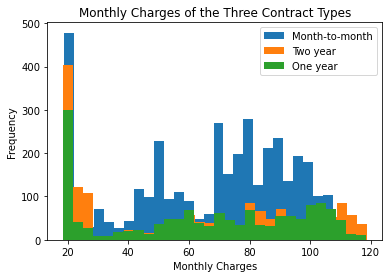

In [56]:
for type in types:
    df[df['type'] == type]['monthly_charges'].plot(kind = 'hist', bins = 30)
    plt.title('Monthly Charges of the Three Contract Types')
plt.legend(types)
plt.xlabel('Monthly Charges')
plt.show

Many contracts are on the lowest monthly charge. At every price range there are more month-to-month contracts than other contracts except at the proce range of 22-26 USD and over 110 USD.

<function matplotlib.pyplot.show(close=None, block=None)>

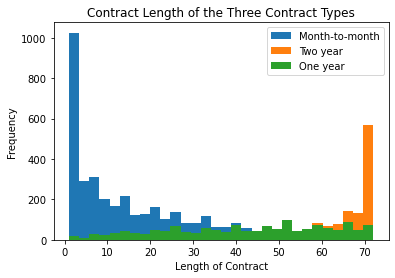

In [57]:
for type in types:
    df[df['type'] == type]['contract_length'].plot(kind = 'hist', bins = 30)
    plt.title('Contract Length of the Three Contract Types')
plt.legend(types)
plt.xlabel('Length of Contract')
plt.show

Length of month-month contracts tend to be shorter than the other types. However, one year contracts are most popular for contract lengths of between 40 and 60 months and Two year contracts are most popular for periods of 60 months or longer.

<AxesSubplot:>

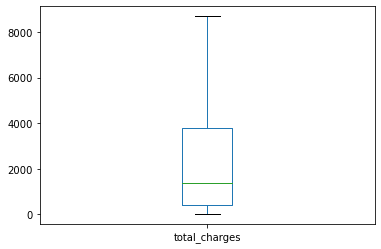

In [58]:
df['total_charges'].plot(kind = 'box')

## Preparing for Model Training

We will now prepare the data for training the models as follows:
- delete columns that will not be useful for the model (customer_id)
- encoding categorical variables
- separating the target variable from the features
- spliting the data into training (75%) and validation (25%) sets
- standardising scales
- examining the balance of the classes and adjusting them if necessary.

Deleting the customer_id columns as it will not be useful for the model:

In [59]:
df = df.drop(columns = ['customer_id'])
df.shape

(7032, 20)

Before we split the date we will encode the categorical variables:

In [60]:
categorical_data = ['type', 'paperless_billing', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
'streaming_movies', 'gender', 'partner', 'dependents', 'multiple_lines']

In [61]:
df_OHE = pd.get_dummies(df, columns=categorical_data, drop_first = True)
df_OHE.shape

(7032, 31)

We now separate the target variables (y) from the features (X):

In [62]:
X = df_OHE.drop(columns = ['churned'])
X.shape

(7032, 30)

In [63]:
y = df_OHE['churned']
y.shape

(7032,)

Splitting the data into training (75%) and validation (25%) sets:

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5274, 30)
(1758, 30)
(5274,)
(1758,)


We will now investigate if there is class imbalance:

In [65]:
def counter(target):
    count_1 = 0
    count_0 = 0
    for i in target:
        if i == 1:
            count_1 += 1
        elif i == 0:
            count_0 += 1
    print ('No of ones =', count_1)
    print ('No of zeros =', count_0)
    print ('Total =', count_1 + count_0)

In [66]:
counter(y_train)

No of ones = 1404
No of zeros = 3870
Total = 5274


There are almost 3 times as many negative class probabilities, ie zeros (= not churned) as there are positive ones ie ones (= churned).  We will therefore use the upsampling technique to address this class imbalance:

In [67]:
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)

    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)

    return X_upsampled, y_upsampled

In [68]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 3)

In [69]:
counter(y_upsampled)

No of ones = 4212
No of zeros = 3870
Total = 8082


In [70]:
X_upsampled.shape

(8082, 30)

In [71]:
y_upsampled.shape

(8082,)

Lastly, we standardise the scales for all features:

In [72]:
scaler = StandardScaler()
scaler.fit(X_upsampled)
X_upsampled_scaled = scaler.transform(X_upsampled)
X_valid_scaled = scaler.transform(X_valid)

The data is now ready for training.

## Training Models 

We will train the following models:
- a Dummy Classifier that returns the most frequent class label in the y argument passed to fit
- Logistic Regression
- Decision Tree Classifier, tuning the 'max_depth' hyperparameter
- Random Forest Classifier, tuning the 'n_estimators' hyperparameter
- Random Forest Classifier with Cross Validation
- LGBM Classifier, varying the num_leaves and max_depth parameters

### Dummy Classifier

This will be our baseline model:

In [73]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_upsampled_scaled, y_upsampled)
valid_predictions = dummy.predict(X_valid_scaled)
valid_probabilities = dummy.predict_proba(X_valid_scaled)
valid_probabilities_one = valid_probabilities[:, 1]

dummy_auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
dummy_accuracy = accuracy_score(y_valid, valid_predictions)

print('AUC ROC =', dummy_auc_roc, '|', 'Accuracy =', dummy_accuracy)

AUC ROC = 0.5 | Accuracy = 0.2645051194539249


### Logistic Regression

In [74]:
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
lr_model.fit(X_upsampled_scaled, y_upsampled)
valid_predictions = lr_model.predict(X_valid_scaled)
valid_probabilities = lr_model.predict_proba(X_valid_scaled)
valid_probabilities_one = valid_probabilities[:, 1] # to access the 2nd column(the positive class probability, ie of 1)

lr_auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
lr_accuracy = accuracy_score(y_valid, valid_predictions)

print('AUC ROC =', lr_auc_roc, '|', 'Accuracy =', lr_accuracy)

AUC ROC = 0.8539796588745021 | Accuracy = 0.7480091012514221


### Decision Tree Classifier

In [75]:
for depth in range(1,15):

    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(X_upsampled_scaled, y_upsampled)
    valid_predictions = model.predict(X_valid_scaled)
    valid_probabilities = model.predict_proba(X_valid_scaled)
    valid_probabilities_one = valid_probabilities[:, 1]

    auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
    accuracy = accuracy_score(y_valid, valid_predictions)

    print('max_depth =', depth, '|', 'AUC ROC =', auc_roc, '|', 'Accuracy =', accuracy)

max_depth = 1 | AUC ROC = 0.6802409999251553 | Accuracy = 0.6501706484641638
max_depth = 2 | AUC ROC = 0.756192567089955 | Accuracy = 0.6501706484641638
max_depth = 3 | AUC ROC = 0.8026453442440269 | Accuracy = 0.7343572241183163
max_depth = 4 | AUC ROC = 0.8234563281191527 | Accuracy = 0.7042093287827076
max_depth = 5 | AUC ROC = 0.8551780056383005 | Accuracy = 0.7627986348122867
max_depth = 6 | AUC ROC = 0.8710667032574075 | Accuracy = 0.7736063708759955
max_depth = 7 | AUC ROC = 0.8670874601867791 | Accuracy = 0.7747440273037542
max_depth = 8 | AUC ROC = 0.8620171477517484 | Accuracy = 0.7940841865756542
max_depth = 9 | AUC ROC = 0.858889471014312 | Accuracy = 0.7935153583617748
max_depth = 10 | AUC ROC = 0.8518549010802585 | Accuracy = 0.8048919226393629
max_depth = 11 | AUC ROC = 0.8423787308002562 | Accuracy = 0.8111490329920364
max_depth = 12 | AUC ROC = 0.8407645801628287 | Accuracy = 0.8333333333333334
max_depth = 13 | AUC ROC = 0.8238846061089906 | Accuracy = 0.83048919226393

The highest AUC ROC is obtained when max_depth = 6:

In [76]:
dt_model = DecisionTreeClassifier(random_state=12345, max_depth=6)
dt_model.fit(X_upsampled_scaled, y_upsampled)
valid_predictions = dt_model.predict(X_valid_scaled)
valid_probabilities = dt_model.predict_proba(X_valid_scaled)
valid_probabilities_one = valid_probabilities[:, 1]

dt_auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
dt_accuracy = accuracy_score(y_valid, valid_predictions)

print('AUC ROC =', dt_auc_roc, '|', 'Accuracy =', dt_accuracy)

AUC ROC = 0.8710667032574075 | Accuracy = 0.7736063708759955


### Random Forest Classifier

In [77]:
for estimator in range(35,65):
    model = RandomForestClassifier(random_state = 12345, n_estimators = estimator)
    model.fit(X_upsampled_scaled, y_upsampled)
    valid_predictions = model.predict(X_valid_scaled)
    valid_probabilities = model.predict_proba(X_valid_scaled)
    valid_probabilities_one = valid_probabilities[:, 1]

    auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
    accuracy = accuracy_score(y_valid, valid_predictions)

    print('n_estimators=', estimator, '|', 'AUC ROC =', auc_roc, '|', 'Accuracy =', accuracy)

n_estimators= 35 | AUC ROC = 0.8695806202130578 | Accuracy = 0.8321956769055745
n_estimators= 36 | AUC ROC = 0.8693718866684963 | Accuracy = 0.8350398179749715
n_estimators= 37 | AUC ROC = 0.8698467346921804 | Accuracy = 0.8310580204778157
n_estimators= 38 | AUC ROC = 0.8707565135676804 | Accuracy = 0.8373151308304891
n_estimators= 39 | AUC ROC = 0.8713278280900465 | Accuracy = 0.8321956769055745
n_estimators= 40 | AUC ROC = 0.8716596395812024 | Accuracy = 0.8361774744027304
n_estimators= 41 | AUC ROC = 0.8714209681577392 | Accuracy = 0.8310580204778157
n_estimators= 42 | AUC ROC = 0.8717785594890602 | Accuracy = 0.8361774744027304
n_estimators= 43 | AUC ROC = 0.8713694084774095 | Accuracy = 0.8304891922639362
n_estimators= 44 | AUC ROC = 0.8714725278380694 | Accuracy = 0.8327645051194539
n_estimators= 45 | AUC ROC = 0.8716288700945538 | Accuracy = 0.8310580204778157
n_estimators= 46 | AUC ROC = 0.8726633901321426 | Accuracy = 0.8350398179749715
n_estimators= 47 | AUC ROC = 0.872971084

The highest AUC ROC is obtained when n_estimators = 62:

In [78]:
rf_model = RandomForestClassifier(random_state = 12345, n_estimators = 62)
rf_model.fit(X_upsampled_scaled, y_upsampled)
valid_predictions = rf_model.predict(X_valid_scaled)
valid_probabilities = rf_model.predict_proba(X_valid_scaled)
valid_probabilities_one = valid_probabilities[:, 1]

rf_auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
rf_accuracy = accuracy_score(y_valid, valid_predictions)
print('AUC ROC =', rf_auc_roc, '|', 'Accuracy =', rf_accuracy)

AUC ROC = 0.8767856697352993 | Accuracy = 0.838452787258248


### Random Forest Classifier with Cross Validation 

In [79]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state = 12345, n_estimators = 62)

In [80]:
roc_auc_scores = cross_val_score(model, X_upsampled_scaled, y_upsampled, cv=10, scoring = 'roc_auc')
rf_cv_auc_roc = roc_auc_scores.mean()
print(roc_auc_scores)
print('AUC ROC = {:.3f}'.format(rf_cv_auc_roc))

[0.99649142 0.99863453 0.99407096 0.99296924 0.99782418 0.99569746
 0.99383159 0.99630509 0.98997097 0.99573122]
AUC ROC = 0.995


In [81]:
accuracy_scores = cross_val_score(model, X_upsampled_scaled, y_upsampled, cv=10, scoring = 'accuracy')
rf_cv_accuracy = accuracy_scores.mean()
print(accuracy_scores)
print('Accuracy = {:.3f}'.format(rf_cv_accuracy))

[0.95055624 0.9394314  0.94059406 0.93935644 0.95420792 0.93193069
 0.94183168 0.94430693 0.93316832 0.94925743]
Accuracy = 0.942


### LightGBM Classifier

LightGBM (light gradient boosting machine) is a fast and accurate model that uses gradient boosting training. Model complexity is controlled by the num_leaves and the max_depth parameters.

In [82]:
for leaves in range(10, 200, 10):
    model = lgb.LGBMClassifier(num_leaves=leaves, learning_rate=0.1, n_estimators=100, max_depth=12, seed = 12345)
    model.fit(X_upsampled_scaled, y_upsampled)
    valid_predictions = model.predict(X_valid_scaled)
    valid_probabilities = model.predict_proba(X_valid_scaled)
    valid_probabilities_one = valid_probabilities[:, 1]

    auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
    accuracy = accuracy_score(y_valid, valid_predictions)

    print('num_leaves =', leaves, '|', 'AUC ROC =', auc_roc, '|', 'Accuracy =', accuracy)

num_leaves = 10 | AUC ROC = 0.9457409209224192 | Accuracy = 0.8651877133105802
num_leaves = 20 | AUC ROC = 0.9634774509559332 | Accuracy = 0.897042093287827
num_leaves = 30 | AUC ROC = 0.9784547064840456 | Accuracy = 0.9385665529010239
num_leaves = 40 | AUC ROC = 0.9955409192592038 | Accuracy = 0.9806598407281001
num_leaves = 50 | AUC ROC = 0.996525542831957 | Accuracy = 0.9852104664391353
num_leaves = 60 | AUC ROC = 0.9952365508237074 | Accuracy = 0.9795221843003413
num_leaves = 70 | AUC ROC = 0.9951301050320585 | Accuracy = 0.9829351535836177
num_leaves = 80 | AUC ROC = 0.9962045422415154 | Accuracy = 0.9840728100113766
num_leaves = 90 | AUC ROC = 0.9961629618541525 | Accuracy = 0.9823663253697383
num_leaves = 100 | AUC ROC = 0.9954311470365659 | Accuracy = 0.9761092150170648
num_leaves = 110 | AUC ROC = 0.9950037006544752 | Accuracy = 0.9766780432309442
num_leaves = 120 | AUC ROC = 0.9936265582250164 | Accuracy = 0.9715585893060296
num_leaves = 130 | AUC ROC = 0.9942935076383173 | A

The highest AUC ROC is obtained when max_depth=12 and num_leaves = 50:

In [83]:
LGBM_model = lgb.LGBMClassifier(num_leaves=50, learning_rate=0.1, n_estimators=100, max_depth=12, seed = 12345)
LGBM_model.fit(X_upsampled_scaled, y_upsampled)
LGBM_valid_predictions = LGBM_model.predict(X_valid_scaled)
valid_probabilities = LGBM_model.predict_proba(X_valid_scaled)
valid_probabilities_one = valid_probabilities[:, 1]

LGBM_auc_roc = roc_auc_score(y_valid, valid_probabilities_one)
LGBM_accuracy = accuracy_score(y_valid, LGBM_valid_predictions)

print('AUC ROC =', LGBM_auc_roc, '|', 'Accuracy =', LGBM_accuracy)

AUC ROC = 0.996525542831957 | Accuracy = 0.9852104664391353


## Results and Conclusions

In [84]:
columns = ['Model', 'AUC ROC', 'Accuracy']
dummy = ['Dummy Classifier (baseline)', dummy_auc_roc, dummy_accuracy]
lr = ['Logistic Regression', lr_auc_roc, lr_accuracy]
dt = ['Decision Tree Classifier', dt_auc_roc, dt_accuracy]
rf = ['Random Forest Classifier', rf_auc_roc, rf_accuracy]
rf_cv = ['Random Forest Classifier with Cross Validation', rf_cv_auc_roc, rf_cv_accuracy]
lgbm = ['LGBM Classifier', LGBM_auc_roc, LGBM_accuracy]

In [85]:
results = pd.DataFrame([dummy, lr, dt, rf, rf_cv, lgbm], columns=list(columns))
results

,Model,AUC ROC,Accuracy
0,Dummy Classifier (baseline),0.500000,0.264505
1,Logistic Regression,0.853980,0.748009
2,Decision Tree Classifier,0.871067,0.773606
3,Random Forest Classifier,0.876786,0.838453
4,Random Forest Classifier with Cross Validation,0.995153,0.942464
5,LGBM Classifier,0.996526,0.985210


#### Conclusion:

The LGBM Classifier performed the best on the data with an AUC ROC of 0.996.  

Of the models without gradient boosting, the Random Forest Classifier with Cross Validation did almost as well with an AUC ROC of 0.995.  

Both of these results are very high. 

To see picture this visually, here is the confusion matrix for the LGBM Classifier:

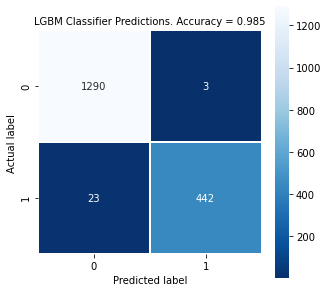

In [86]:
conf_matrix = confusion_matrix(y_valid, LGBM_valid_predictions)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('LGBM Classifier Predictions. Accuracy = {:.3f}'.format(LGBM_accuracy), size = 10);

Of the 1758 observations in the validation set, 442 were correctly identified as being labelled 1 and 1290 were correctly identified as being labelled 0.  Only 26 of the observations were mis-identified: 23 were 1, but were predicted as 0 and 3 were actually 0 but were predicted to be 1.

## Solution Report

#### What steps of the plan were performed and what steps were skipped (explain why)?

The following steps were performed:

##### Reading the Data

- I read in all 4 datasets and investigated the data and whether null values were present

##### Pre-processing the Data

- I first needed to ensure the data types of each column were correct. In the Contract dataset this meant first converting the date columns ('begin_date' and 'end_date') and to the 'datetime' data type.  From these columns my aim was to calculate the start, end and length of each contract. 
- In the contract dataset I also had to create the 'target column ('churned') from the end_date column.  This column contained the labels: 1 if the contract ended on the end_date (ie it churned) or 0 if the contact did not end. 
- Then I checked for duplicate IDs in each of the 4 datasets - there were none. I also ensured that the customer IDs in the 'internet', 'personal' and 'phone' datasets were contained in the 'contract' dataset.
- Then I joined the 4 datasets together into a single dataframe, replacing any resulting null values with 'N/A'

#### Exploratory Data Analysis (EDA)

- I Checked the distribution of the numeric columns and plotted, for each of the 3 contract types (Month-to-month, Two year and One year), the distribution of monthly charges and conract length.

#### Preparing for Model Training

To prepare the data for training, I performed the following steps:
- Deleted columns that were not useful for the model (customer_id and some date information)
- Encoded the categorical variables using 'One Hot Encoding'
- Separated the target variable ('churned') from the features
- Split the data into training and validation sets in the ratio 75/25
- Examined the balance of the classes and then adjusted them using 'upsampling'
- Standardised scales using 'Standard Scaler'

#### Training Models 

I trained the following models:
- Dummy Classifier that returned the most frequent class label in the y argument passed to fit, this served as the baseline
- Logistic Regression
- Decision Tree Classifier, tuning the 'max_depth' hyperparameter
- Random Forest Classifier, tuning the 'n_estimators' hyperparameter
- Random Forest Classifier with Cross Validation (having already identified the optimum value for 'n_estimators')
- LightGBM Classifier, varying both the num_leaves and max_depth parameters

What steps were skipped?

I was originally planning to also train models using the XGBoost and Catboost algorithms, but decided this was not necessary as the results I received from some of the existing models were already in excess of the threshold required.

#### What difficulties did you encounter and how did you manage to solve them?

1. With the 'end_date' column I had to calculate both the length of each contract and create the target ('churned') column.  To do this I created a copy of the 'end_date' column to avoid losing the information on which contracts had not yet churned.
2. To train the models we needed to discard all non-numeric columns (or convert the non-numberic columns to numeric ones).  Even after deleting the 'DateTime' data type columns, the models seemed to be performing too well - so I suspected some 'data leakage' (where the features dataset was receiving information about the response). To deal with this, it was necessary to delete all the date information other than the month of the start of the contract and the length of the contract.
3. It was initially problematic to change the type of the 'total_charges' column to a numeric data type until I realised that there were 11 contracts will null values for 'total_charges'.  After further investigation it transpired that these were contract that had only just started on Feb 1 2020 and had no payments had been made yet.  I deleted these 11 contracts from the dataset.
4. I initially encountered problems in the 'Preparing for Model Training' stage until I realised the importance of the order of the operations. Most importantly, the scaling has to be the last step as the output of this is an array.

#### What were some of the key steps to solving the task?

1. Calculating contract length
2. Creating the 'churned' target column
3. Joining the datasets and deleting non-useful or problematic columns for model training
4. Encoding catagorical variables
5. Addressing the balance of the classes
6. Standardising the scales of the features in the training set
7. Tuning hyperparameters in the various models to increase AUC ROC
8. Using Cross Validation and optimising the number of folds

#### What is your final model and what quality score does it have?

The best performing model is the LGBM Classifier with an AUC ROC of 0.9965 and Accuracy of 0.9852.  However, the Random Forest Classifier with Cross Validation was a very close second with an AUC ROC of 0.9951 and an Accuracy of 0.9415. 